In [1]:
import textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size': 22})
from scipy import stats

## GSM8K

In [2]:
gsm8k = pd.read_csv('data/gsm8k_questions.csv')
gsm8k = gsm8k.drop_duplicates(subset = 'instruction')
gsm8k_grades = []
gsm8k_ndc = []
for i in range(0, len(gsm8k)):
    text = gsm8k.iloc[i]['instruction']
    grade = textstat.flesch_kincaid_grade(text)
    ndc = textstat.dale_chall_readability_score(text)
    if grade < -3.40:
        grade = -3.40
    gsm8k_grades.append(grade)
    gsm8k_ndc.append(ndc)
print(len(gsm8k))
print(np.mean(gsm8k_grades), max(gsm8k_grades), min(gsm8k_grades), np.std(gsm8k_grades), stats.sem(gsm8k_grades))
print(np.mean(gsm8k_ndc), max(gsm8k_ndc), min(gsm8k_ndc), np.std(gsm8k_ndc), stats.sem(gsm8k_ndc))
gsm8k

6403
4.249508043104794 26.3 -3.4 2.480232829471063 0.03099806729870812
8.173223488989535 13.9 0.0 1.1268597703048406 0.0140835467465228


,Unnamed: 0,instruction
0,6,"At a pool party, there are 4 pizzas cut into 1..."
1,7,Noel bakes 4 dozen donuts for his class. There...
2,32,Gus eats 2 eggs-omelet for breakfast. He has ...
3,76,Grace baked 4 whole pumpkin pies. She sold 1 w...
4,108,Ocho has 8 friends and half are girls. His fri...
...,...,...
14544,261237,Freddy is 2 years younger than Stephanie. Step...
14547,261248,Laura needs to buy window treatments for 3 win...
14551,261288,It takes Matt 2 minutes per problem to do his ...
14556,261315,Jerry has an interesting novel he borrowed fro...


## NumGlue

In [3]:
numglue = pd.read_csv('data/numglue_questions.csv')
numglue_grades = []
numglue_ndc = []
numglue = numglue.drop_duplicates(subset = 'instruction')
for i in range(0, len(numglue)):
    text = numglue.iloc[i]['instruction']
    text = str(text)
    grade = textstat.flesch_kincaid_grade(text)
    ndc = textstat.dale_chall_readability_score(text)
    if grade < -3.40:
        grade = -3.40
    numglue_grades.append(grade)
    numglue_ndc.append(ndc)
print(len(numglue))
print(np.mean(numglue_grades), max(numglue_grades), min(numglue_grades), np.std(numglue_grades), stats.sem(numglue_grades))
print(np.mean(numglue_ndc), max(numglue_ndc), min(numglue_ndc), np.std(numglue_ndc), stats.sem(numglue_ndc))
numglue

12403
10.038087559461422 46.9 -3.4 6.989979625191985 0.06276680845187915
10.271230347496573 19.77 0.0 1.5146106890476325 0.013600508741970814


,Unnamed: 0,instruction
0,10,NaN
1,14,"Passage: According to CBS, in 2001 the ethnic ..."
2,60,There were 58.0 geese and 37.0 ducks in the ma...
3,69,Adolfo made a tower with 35 blocks. He added s...
4,81,Connie has 323 marbles. Juan has 175 more marb...
...,...,...
13469,261903,A tortoise travels 400 cm in a second and turt...
13470,261906,"""statement 1"": Annie , working alone , can do..."
13471,261917,"""statement 1"": Each year, salmon travel upstr..."
13472,261933,"""statement 1"": more than 20 % of students fro..."


## ASDIV

In [4]:
asdiv = pd.read_csv('data/ASDIV_clean.csv')
asdiv_grades = []
asdiv_ndc = []
for i in range(0, len(asdiv)):
    text = asdiv.iloc[i]['question']
    text = str(text)
    grade = textstat.flesch_kincaid_grade(text)
    ndc = textstat.dale_chall_readability_score(text)
    if grade < -3.40:
        grade = -3.40
    asdiv_grades.append(grade)
    asdiv_ndc.append(ndc)
print(len(asdiv))
print(np.mean(asdiv_grades), max(asdiv_grades), min(asdiv_grades), np.std(asdiv_grades), stats.sem(asdiv_grades))
print(np.mean(asdiv_ndc), max(asdiv_ndc), min(asdiv_ndc), np.std(asdiv_ndc), stats.sem(asdiv_ndc))
asdiv.drop_duplicates(subset = 'question')

2305
3.5560954446854667 13.8 -1.9 2.398158807400107 0.04996164182083555
7.852767895878525 15.3 0.3 1.4764454501896813 0.030759280212285033


,Unnamed: 0,question_number,question,grade,answer,math_topic
0,0,question_0,Seven red apples and two green apples are in t...,1,9 (apples),Addition
1,1,question_1,Ellen has six more balls than Marin. Marin has...,1,15 (balls),Addition
2,2,question_2,Janet has nine oranges and Sharon has seven or...,1,16 (oranges),Addition
3,3,question_3,Allan brought two balloons and Jake brought fo...,1,6 (balloons),Addition
4,4,question_4,Adam has five more apples than Jackie. Jackie ...,1,14 (apples),Addition
...,...,...,...,...,...,...
2300,2300,question_2300,There are 3300 bananas in Janice's banana coll...,4,44 (bananas),Common-Division
2301,2301,question_2301,Janice has 316 bottle caps that must be put aw...,4,4 (bottle caps),Common-Division
2302,2302,question_2302,Chris is inviting 82 friends to a party. He ha...,4,22 (cookies),Common-Division
2303,2303,question_2303,Keith has 5530 marbles and 3 pencils. If he sh...,4,70 (marbles),Common-Division


## SVAMP

In [5]:
svamp = pd.read_json('data/svamp.json')
svamp['question'] = svamp['Body'] + " " + svamp['Question']
svamp_grades = []
svamp_ndc = []
for i in range(0, len(svamp)):
    text = svamp.iloc[i]['question']
    text = str(text)
    grade = textstat.flesch_kincaid_grade(text)
    ndc = textstat.dale_chall_readability_score(text)
    if grade < -3.40:
        grade = -3.40
    svamp_grades.append(grade)
    svamp_ndc.append(ndc)
print(len(svamp))
print(np.mean(svamp_grades), max(svamp_grades), min(svamp_grades), np.std(svamp_grades), stats.sem(svamp_grades))
print(np.mean(svamp_ndc), max(svamp_ndc), min(svamp_ndc), np.std(svamp_ndc), stats.sem(svamp_ndc))
svamp.drop_duplicates(subset = 'question')

1000
3.3919 12.1 -1.2 2.0658374548836123 0.06536020460759244
7.83707 11.69 1.27 1.0867358074067497 0.03438279936235548


,ID,Body,Question,Equation,Answer,Type,question
0,chal-1,Each pack of dvds costs 76 dollars. If there i...,How much do you have to pay to buy each pack?,( 76.0 - 25.0 ),51,Subtraction,Each pack of dvds costs 76 dollars. If there i...
1,chal-2,Dan had $ 3 left with him after he bought a ca...,How much did the candy bar cost?,( 4.0 - 3.0 ),1,Subtraction,Dan had $ 3 left with him after he bought a ca...
2,chal-3,Paco had 26 salty cookies and 17 sweet cookies...,How many salty cookies did Paco have left?,( 26.0 - 9.0 ),17,Subtraction,Paco had 26 salty cookies and 17 sweet cookies...
3,chal-4,43 children were riding on the bus. At the bus...,How many children got off the bus at the bus s...,( 43.0 - 21.0 ),22,Subtraction,43 children were riding on the bus. At the bus...
4,chal-5,28 children were riding on the bus. At the bus...,How many more children got on the bus than tho...,( 30.0 - 28.0 ),2,Subtraction,28 children were riding on the bus. At the bus...
...,...,...,...,...,...,...,...
995,chal-996,Paige was helping her mom plant flowers and to...,How many flower beds did they have?,( 36.0 / 12.0 ),3,Common-Division,Paige was helping her mom plant flowers and to...
996,chal-997,"At the zoo, a cage had 3 snakes and 75 alligat...",How many alligators were not hiding?,( 75.0 - 19.0 ),56,Subtraction,"At the zoo, a cage had 3 snakes and 75 alligat..."
997,chal-998,Paige was helping her mom plant flowers and to...,How many flowers did they grow?,( 60.0 * ( 55.0 / 15.0 ) ),220,Multiplication,Paige was helping her mom plant flowers and to...
998,chal-999,Mary is baking a cake. The recipe calls for 7 ...,How many more cups of sugar does she need to add?,( 7.0 - 4.0 ),3,Subtraction,Mary is baking a cake. The recipe calls for 7 ...


## GSM-Hard

In [6]:
import jsonlines
import json
file_path = 'data/gsmhardv2.jsonl'
data = []

with jsonlines.open(file_path) as reader:
    for line in reader:
        data.append(line)
for item in data:
    item["question"] = item['input'] 
    del item['input']
    del item['code']
    del item['target']
# Write the data to a new JSON file
output_file = "data/gsmhard.json"
with open(output_file, 'w') as json_file:
    json.dump(data, json_file)
gsm_hard = pd.read_json('data/gsmhard.json')
gsm_hard_grades = []
gsm_hard_ndc = []
for i in range(0, len(gsm_hard)):
    text = gsm_hard.iloc[i]['question']
    text = str(text)
    grade = textstat.flesch_kincaid_grade(text)
    ndc = textstat.dale_chall_readability_score(text)
    if grade < -3.40:
        grade = -3.40
    gsm_hard_grades.append(grade)
    gsm_hard_ndc.append(ndc)
print(len(gsm_hard))
print(np.mean(gsm_hard_grades), max(gsm_hard_grades), min(gsm_hard_grades), np.std(gsm_hard_grades), stats.sem(gsm_hard_grades))
print(np.mean(gsm_hard_ndc), max(gsm_hard_ndc), min(gsm_hard_ndc), np.std(gsm_hard_ndc), stats.sem(gsm_hard_ndc))
gsm_hard.drop_duplicates(subset = 'question')

1319
4.205686125852918 16.5 -1.8 2.4302564867518868 0.06694134065787799
8.19819560272934 13.04 5.42 1.1323008925399531 0.031189193481401766


,question
0,Janet’s ducks lay 16 eggs per day. She eats th...
1,A robe takes 2287720 bolts of blue fiber and h...
2,James decides to run 1793815 sprints 1793815 t...
3,"Every day, Wendi feeds each of her chickens th..."
4,Kylar went to the store to buy glasses for his...
...,...
1314,Jen decides to travel to 3 different countries...
1315,"Alex, Stan, and Adelwolfe are trying to catch ..."
1316,The red rope was four times the length of the ...
1317,A farm has 10 2-legged animals and 8765805 4-l...


## MATHWELL Annotated

In [7]:
def readability(df):
    grades = []
    ndcs = []
    for i in range(0, len(df)):
        text = df.iloc[i]['question']
        text = str(text)
        grade = textstat.flesch_kincaid_grade(text)
        ndc = textstat.dale_chall_readability_score(text)
        if grade < -3.40:
            grade = -3.40
        grades.append(grade)
        ndcs.append(ndc)
    return grades, ndcs
def readability_all(df):
    grades = []
    ndcs = []
    for i in range(0, len(df)):
        text = df.iloc[i]['text']
        text = str(text)
        grade = textstat.flesch_kincaid_grade(text)
        ndc = textstat.dale_chall_readability_score(text)
        if grade < -3.40:
            grade = -3.40
        grades.append(grade)
        ndcs.append(ndc)
    return grades, ndcs
annotations = pd.read_csv('data/evaluation_annotations.csv')
annotations = annotations[[
 'solvability',
 'accuracy',
 'appropriateness',
 'topic',
 'addition',
 'subtraction',
 'multiplication',
 'division',
 'fractions',
 'decimals',
 'no_ops',
 'total_ops',
 'good',
 'question',
 'solution',
 'answer',
 'gpt35',
 'gpt4',
 'llama',
 'llema',
 'mammoth',
 'mathwell']]
annotation_readability = readability(annotations)
annotations['fkgl'] = annotation_readability[0]
annotations['ndc'] = annotation_readability[1]
annotations.to_csv('data/evaluation_annotations.csv', index = False)

In [8]:
gsm8k = pd.read_csv("data/gsm8k_original.csv")
gsm8k_grades = readability(gsm8k)

In [9]:
mathwell_an = pd.read_csv('data/mathwell_annotations_final.csv')
mathwell_an

,model,question,solution,answer,accuracy,solvability,appropriateness,good
0,mathwell,"LeBron James is 6'9"" tall. 1 inch is 2.54 cm. ...","def solution():\n #LeBron James is 6'9"" tal...",205.74,1.0,1,1.0,1
1,mathwell,Captain America has 1200 ryo. He spends 400 ry...,def solution():\n #Captain America started ...,300.0,1.0,1,1.0,1
2,mathwell,A 250-car train is 2.5 miles long. How many 25...,def solution():\n #1 train is 2.5 miles lon...,211200.0,0.0,1,1.0,0
3,mathwell,3 scoops of ice cream cost $4. \nHow much does...,def solution():\n #3 scoops of ice cream co...,13.333333333333332,1.0,1,1.0,1
4,mathwell,Iron Man has 500 gold coins. He can use 10 gol...,def solution():\n #Iron Man has 500 gold co...,16.666666666666668,1.0,1,0.0,0
...,...,...,...,...,...,...,...,...
3729,finetuned_llama,A field hockey game has 11 players per team. T...,def solution():\n #A field hockey game has ...,33,0.0,1,0.0,0
3730,finetuned_llama,100 turtles are at the pond. 10 turtles are ea...,def solution():\n #Total turtles\n total...,0,0.0,1,0.0,0
3731,finetuned_llama,Barbie has 1200 Instagram followers. 200 more ...,def solution():\n #Barbie started with 1200...,1150,0.0,0,NaN,0
3732,finetuned_llama,1234567890 is a 10-digit number. \nHow many 3-...,def solution():\n #10-digit number has 10 d...,3.3333333333333335,0.0,1,0.0,0


In [10]:
mathwell_an_grades = readability(mathwell_an)
print(np.mean(mathwell_an_grades[0]), max(mathwell_an_grades[0]), min(mathwell_an_grades[0]), np.std(mathwell_an_grades[0]))
print(np.mean(mathwell_an_grades[1]), max(mathwell_an_grades[1]), min(mathwell_an_grades[1]), np.std(mathwell_an_grades[1]), stats.sem(mathwell_an_grades[1]))

2.4996250669523294 13.4 -3.4 1.804034895862165
8.15400107123728 27.42 0.0 1.2909873220391042 0.02112968304073699


In [11]:
mathwell_an

,model,question,solution,answer,accuracy,solvability,appropriateness,good
0,mathwell,"LeBron James is 6'9"" tall. 1 inch is 2.54 cm. ...","def solution():\n #LeBron James is 6'9"" tal...",205.74,1.0,1,1.0,1
1,mathwell,Captain America has 1200 ryo. He spends 400 ry...,def solution():\n #Captain America started ...,300.0,1.0,1,1.0,1
2,mathwell,A 250-car train is 2.5 miles long. How many 25...,def solution():\n #1 train is 2.5 miles lon...,211200.0,0.0,1,1.0,0
3,mathwell,3 scoops of ice cream cost $4. \nHow much does...,def solution():\n #3 scoops of ice cream co...,13.333333333333332,1.0,1,1.0,1
4,mathwell,Iron Man has 500 gold coins. He can use 10 gol...,def solution():\n #Iron Man has 500 gold co...,16.666666666666668,1.0,1,0.0,0
...,...,...,...,...,...,...,...,...
3729,finetuned_llama,A field hockey game has 11 players per team. T...,def solution():\n #A field hockey game has ...,33,0.0,1,0.0,0
3730,finetuned_llama,100 turtles are at the pond. 10 turtles are ea...,def solution():\n #Total turtles\n total...,0,0.0,1,0.0,0
3731,finetuned_llama,Barbie has 1200 Instagram followers. 200 more ...,def solution():\n #Barbie started with 1200...,1150,0.0,0,NaN,0
3732,finetuned_llama,1234567890 is a 10-digit number. \nHow many 3-...,def solution():\n #10-digit number has 10 d...,3.3333333333333335,0.0,1,0.0,0


In [12]:
mathwell_train = mathwell_an[mathwell_an['good']==1]
mathwell_train = mathwell_train.drop_duplicates(subset = 'question')
mathwell_train_grades = readability(mathwell_train)
print(np.mean(mathwell_train_grades[0]), max(mathwell_train_grades[0]), min(mathwell_train_grades[0]), np.std(mathwell_train_grades[0]), stats.sem(mathwell_train_grades[0]))
print(np.mean(mathwell_train_grades[1]), max(mathwell_train_grades[1]), min(mathwell_train_grades[1]), np.std(mathwell_train_grades[1]), stats.sem(mathwell_train_grades[1]))

2.475946547884187 12.2 -3.1 1.7533119933194796 0.037012445189340125
8.120498886414252 27.42 5.35 1.2428818514924744 0.026237256449775797


In [13]:
sgsm= pd.read_csv('data/sgsm.csv')
sgsm_unan = sgsm[sgsm['subset']=='sgsm_unannotated']
sgsm_unan_grades = readability(sgsm_unan)
print(np.mean(sgsm_unan_grades[0]), max(sgsm_unan_grades[0]), min(sgsm_unan_grades[0]), np.std(sgsm_unan_grades[0]), stats.sem(sgsm_unan_grades[0]))
print(np.mean(sgsm_unan_grades[1]), max(sgsm_unan_grades[1]), min(sgsm_unan_grades[1]), np.std(sgsm_unan_grades[1]), stats.sem(sgsm_unan_grades[1]))

2.697961624177855 24.3 -3.4 1.994771029893065 0.014707245836996173
7.96997608305702 35.27 0.97 1.2611099447026646 0.009298036569749573


In [14]:
#sgsm = pd.concat([sgsm_unan, mathwell_train])
sgsm_grades = readability(sgsm)
print(np.mean(sgsm_grades[0]), max(sgsm_grades[0]), min(sgsm_grades[0]), np.std(sgsm_grades[0]), stats.sem(sgsm_grades[0]))
print(np.mean(sgsm_grades[1]), max(sgsm_grades[1]), min(sgsm_grades[1]), np.std(sgsm_grades[1]), stats.sem(sgsm_grades[1]))

2.677364568081991 24.3 -3.4 1.9727202704218252 0.013781774064698694
7.985800390434358 35.27 0.97 1.2610993276045972 0.008810263810222627


## MATHWELL Final Questions

In [15]:
mathwell_all = pd.read_csv('data/mathwell_solvability.csv')
mathwell_all_grades = readability_all(mathwell_all)
print(np.mean(mathwell_all_grades[0]), max(mathwell_all_grades[0]), min(mathwell_all_grades[0]), np.std(mathwell_all_grades[0]))
print(np.mean(mathwell_all_grades[1]), max(mathwell_all_grades[1]), min(mathwell_all_grades[1]), np.std(mathwell_all_grades[1]), stats.sem(mathwell_all_grades[1]))

2.2408 6.8 -2.3 1.6470140740139412
8.228119999999999 12.13 5.49 1.2243653317535579 0.07759100022336772


In [16]:
mathwell_good = pd.read_csv('data/mathwell_good.csv')
mathwell_good_grades = readability(mathwell_good)
print(np.mean(mathwell_good_grades[0]), max(mathwell_good_grades[0]), min(mathwell_good_grades[0]), np.std(mathwell_good_grades[0]))
print(np.mean(mathwell_good_grades[1]), max(mathwell_good_grades[1]), min(mathwell_good_grades[1]), np.std(mathwell_good_grades[1]), stats.sem(mathwell_good_grades[1]))

2.4005347593582886 6.8 -2.3 1.6162774066381365
8.251818181818182 12.13 6.01 1.2310648879673236 0.09026605711224675


## GPT 3.5

In [17]:
gpt35_all = pd.read_csv('data/gpt35_solvability.csv')
gpt35_all_grades = readability_all(gpt35_all)
print(np.mean(gpt35_all_grades[0]), max(gpt35_all_grades[0]), min(gpt35_all_grades[0]), np.std(gpt35_all_grades[0]))
print(np.mean(gpt35_all_grades[1]), max(gpt35_all_grades[1]), min(gpt35_all_grades[1]), np.std(gpt35_all_grades[1]), stats.sem(gpt35_all_grades[1]))

3.7112 9.6 -3.4 1.9071535229236267
8.631 19.48 5.54 1.3167153830649962 0.08344344692869156


In [18]:
gpt35_good = pd.read_csv('data/gpt35_good.csv')
gpt35_good_grades = readability(gpt35_good)
print(np.mean(gpt35_good_grades[0]), max(gpt35_good_grades[0]), min(gpt35_good_grades[0]), np.std(gpt35_good_grades[0]))
print(np.mean(gpt35_good_grades[1]), max(gpt35_good_grades[1]), min(gpt35_good_grades[1]), np.std(gpt35_good_grades[1]), stats.sem(gpt35_good_grades[1]))

3.4828025477707003 8.5 -0.8 1.7340052800758965
8.73891719745223 11.74 6.35 1.0802368103300988 0.08648816305522739


## GPT 4

In [19]:
gpt4_all = pd.read_csv('data/gpt4_solvability.csv')
gpt4_all_grades = readability_all(gpt4_all)
print(np.mean(gpt4_all_grades[0]), max(gpt4_all_grades[0]), min(gpt4_all_grades[0]), np.std(gpt4_all_grades[0]))
print(np.mean(gpt4_all_grades[1]), max(gpt4_all_grades[1]), min(gpt4_all_grades[1]), np.std(gpt4_all_grades[1]), stats.sem(gpt4_all_grades[1]))

4.920799999999999 18.4 -0.6 2.230974531454808
8.264719999999999 11.84 5.71 1.0557056983837874 0.06690263024826862


In [20]:
gpt4_good = pd.read_csv('data/gpt4_good.csv')
gpt4_good_grades = readability(gpt4_good)
print(np.mean(gpt4_good_grades[0]), max(gpt4_good_grades[0]), min(gpt4_good_grades[0]), np.std(gpt4_good_grades[0]))
print(np.mean(gpt4_good_grades[1]), max(gpt4_good_grades[1]), min(gpt4_good_grades[1]), np.std(gpt4_good_grades[1]), stats.sem(gpt4_good_grades[1]))

5.060913705583756 18.4 0.2 2.254548741563657
8.228274111675127 10.53 5.71 1.0641872406857846 0.0760133743346989


## Llama Questions

In [21]:
llama_all = pd.read_csv('data/llama_solvability.csv')
llama_all_grades = readability_all(llama_all)
print(np.mean(llama_all_grades[0]), max(llama_all_grades[0]), min(llama_all_grades[0]), np.std(llama_all_grades[0]))
print(np.mean(llama_all_grades[1]), max(llama_all_grades[1]), min(llama_all_grades[1]), np.std(llama_all_grades[1]), stats.sem(llama_all_grades[1]))

2.2436 10.3 -2.0 1.7713664330115326
8.19596 11.07 5.61 1.1175630981738793 0.07082268368040552


In [22]:
llama_good = pd.read_csv('data/llama_good.csv')
llama_good_grades = readability(llama_good)
print(np.mean(llama_good_grades[0]), max(llama_good_grades[0]), min(llama_good_grades[0]), np.std(llama_good_grades[0]))
print(np.mean(llama_good_grades[1]), max(llama_good_grades[1]), min(llama_good_grades[1]), np.std(llama_good_grades[1]), stats.sem(llama_good_grades[1]))

2.2108974358974356 6.9 -2.0 1.704277187863039
8.272499999999999 11.07 5.65 1.1433753589869171 0.09183811885291251


## Llema Questions

In [23]:
llema_all = pd.read_csv('data/llema_solvability.csv')
llema_all_grades = readability_all(llema_all)
print(np.mean(llema_all_grades[0]), max(llema_all_grades[0]), min(llema_all_grades[0]), np.std(llema_all_grades[0]))
print(np.mean(llema_all_grades[1]), max(llema_all_grades[1]), min(llema_all_grades[1]), np.std(llema_all_grades[1]), stats.sem(llema_all_grades[1]))

3.3224 11.1 -1.5 2.1601431063705014
8.40608 12.82 5.39 1.3825948913546586 0.08761839113027028


In [24]:
llema_good = pd.read_csv('data/llema_good.csv')
llema_good_grades = readability(llema_good)
print(np.mean(llema_good_grades[0]), max(llema_good_grades[0]), min(llema_good_grades[0]), np.std(llema_good_grades[0]))
print(np.mean(llema_good_grades[1]), max(llema_good_grades[1]), min(llema_good_grades[1]), np.std(llema_good_grades[1]), stats.sem(llema_good_grades[1]))

3.0578947368421048 7.2 -0.8 2.059845622594001
8.567105263157893 11.93 6.44 1.259536063073553 0.20706645324386877


## Mammoth Questions

In [25]:
mammoth_all = pd.read_csv('data/mammoth_solvability.csv')
mammoth_all_grades = readability_all(mammoth_all)
print(np.mean(mammoth_all_grades[0]), max(mammoth_all_grades[0]), min(mammoth_all_grades[0]), np.std(mammoth_all_grades[0]))
print(np.mean(mammoth_all_grades[1]), max(mammoth_all_grades[1]), min(mammoth_all_grades[1]), np.std(mammoth_all_grades[1]), stats.sem(mammoth_all_grades[1]))

2.8708 10.7 -1.7 2.17997875219003
8.25176 13.51 5.66 1.2592703055341217 0.07980301305823417


In [26]:
mammoth_good = pd.read_csv('data/mammoth_good.csv')
mammoth_good_grades = readability(mammoth_good)
print(np.mean(mammoth_good_grades[0]), max(mammoth_good_grades[0]), min(mammoth_good_grades[0]), np.std(mammoth_good_grades[0]))
print(np.mean(mammoth_good_grades[1]), max(mammoth_good_grades[1]), min(mammoth_good_grades[1]), np.std(mammoth_good_grades[1]), stats.sem(mammoth_good_grades[1]))

2.8119718309859154 10.7 -1.7 2.2316065833539027
8.274788732394367 13.51 5.71 1.2420007248131626 0.1045953296367414


## DNC Significance Test

In [27]:
# Perform an independent two-sample t-test on solvability
t_statistic, p_value = stats.ttest_ind(mathwell_train_grades[1], mathwell_all_grades[1])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.3001122135152963
P-value: 0.19368269717066797


In [28]:
# Perform an independent two-sample t-test on solvability
t_statistic, p_value = stats.ttest_ind(sgsm_unan_grades[1], mathwell_all_grades[1])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -3.215821395840521
P-value: 0.0013029350717630756


In [29]:
# Perform an independent two-sample t-test on solvability
t_statistic, p_value = stats.ttest_ind(gsm8k_ndc, mathwell_all_grades[1])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.7529989194934711
P-value: 0.4514772147976349


In [30]:
# Perform an independent two-sample t-test on solvability
t_statistic, p_value = stats.ttest_ind(mathwell_train_grades[1], llema_all_grades[1])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -3.404569926823007
P-value: 0.0006731647703016927


## FKGL Plots

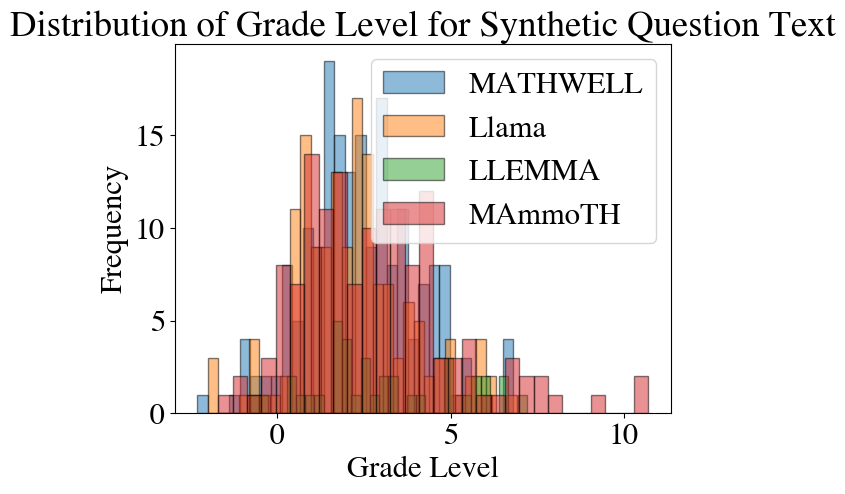

In [31]:
# Create a histogram
plt.hist(mathwell_good_grades[0], bins=30, alpha=0.5, label='MATHWELL', edgecolor='black')
plt.hist(llama_good_grades[0], bins=30, alpha=0.5, label='Llama', edgecolor='black')
plt.hist(llema_good_grades[0], bins=30, alpha=0.5, label='LLEMMA', edgecolor='black')
plt.hist(mammoth_good_grades[0], bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black')

# Customize the plot
plt.title('Distribution of Grade Level for Synthetic Question Text')
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

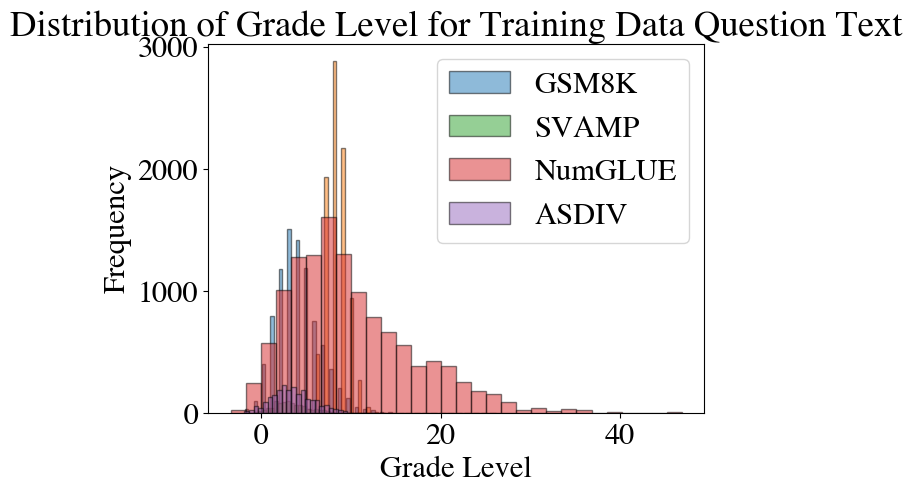

In [32]:
# Create a histogram
plt.hist(gsm8k_grades, bins=30, alpha=0.5, label='GSM8K', edgecolor='black')
plt.hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black')
plt.hist(numglue_grades, bins=30, alpha=0.5, label='NumGLUE', edgecolor='black')
plt.hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black')

# Customize the plot
plt.title('Distribution of Grade Level for Training Data Question Text')
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

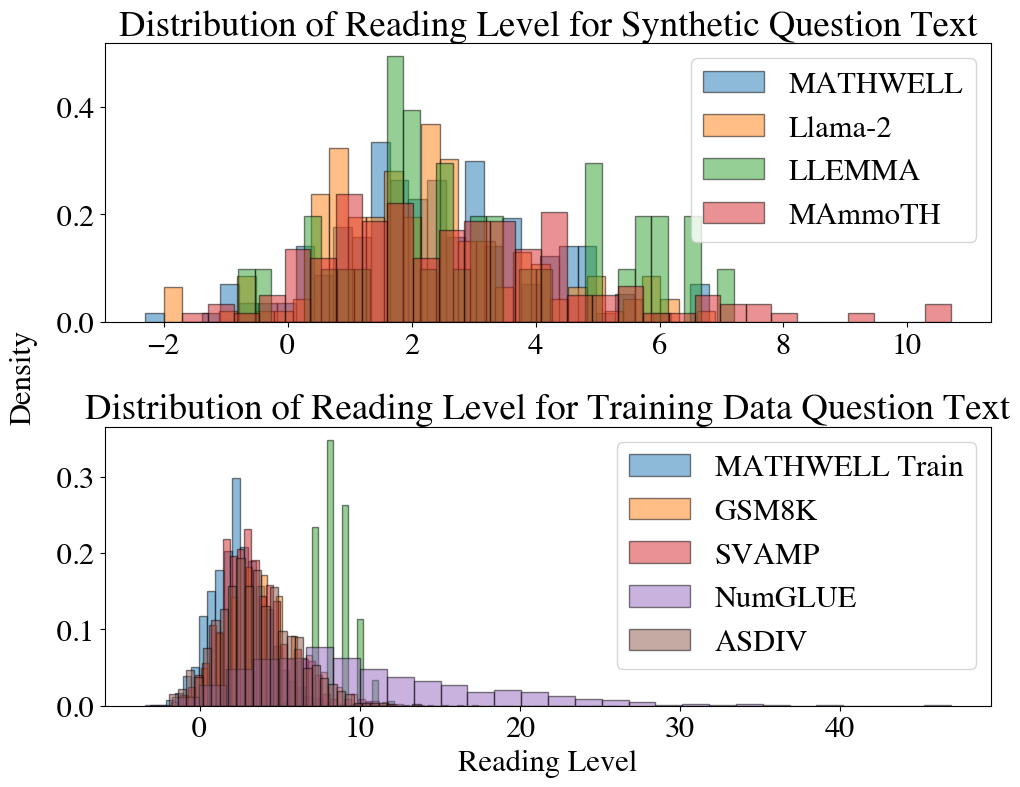

<Figure size 640x480 with 0 Axes>

In [33]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot the first histogram on the top subplot
axs[0].hist(mathwell_good_grades[0], bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0].hist(llama_good_grades[0], bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True)
axs[0].hist(llema_good_grades[0], bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True)
axs[0].hist(mammoth_good_grades[0], bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True)
axs[0].legend()
axs[0].set_title('Distribution of Reading Level for Synthetic Question Text')

# Plot the second histogram on the bottom subplot
axs[1].hist(mathwell_train_grades[0], bins=30, alpha=0.5, label='MATHWELL Train', edgecolor='black', density=True)
axs[1].hist(gsm8k_grades, bins=30, alpha=0.5, label='GSM8K', edgecolor='black', density=True)
axs[1].hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black', density=True)
axs[1].hist(numglue_grades, bins=30, alpha=0.5, label='NumGLUE', edgecolor='black', density=True)
axs[1].hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black', density=True)
axs[1].legend()
axs[1].set_title('Distribution of Reading Level for Training Data Question Text')

# Customize the overall layout
plt.tight_layout()
plt.xlabel('Reading Level')
fig.text(0.0, 0.5, 'Density', ha='center', va='center', rotation='vertical')

# Show the plot
plt.show()
plt.savefig('reading_level_his.png')

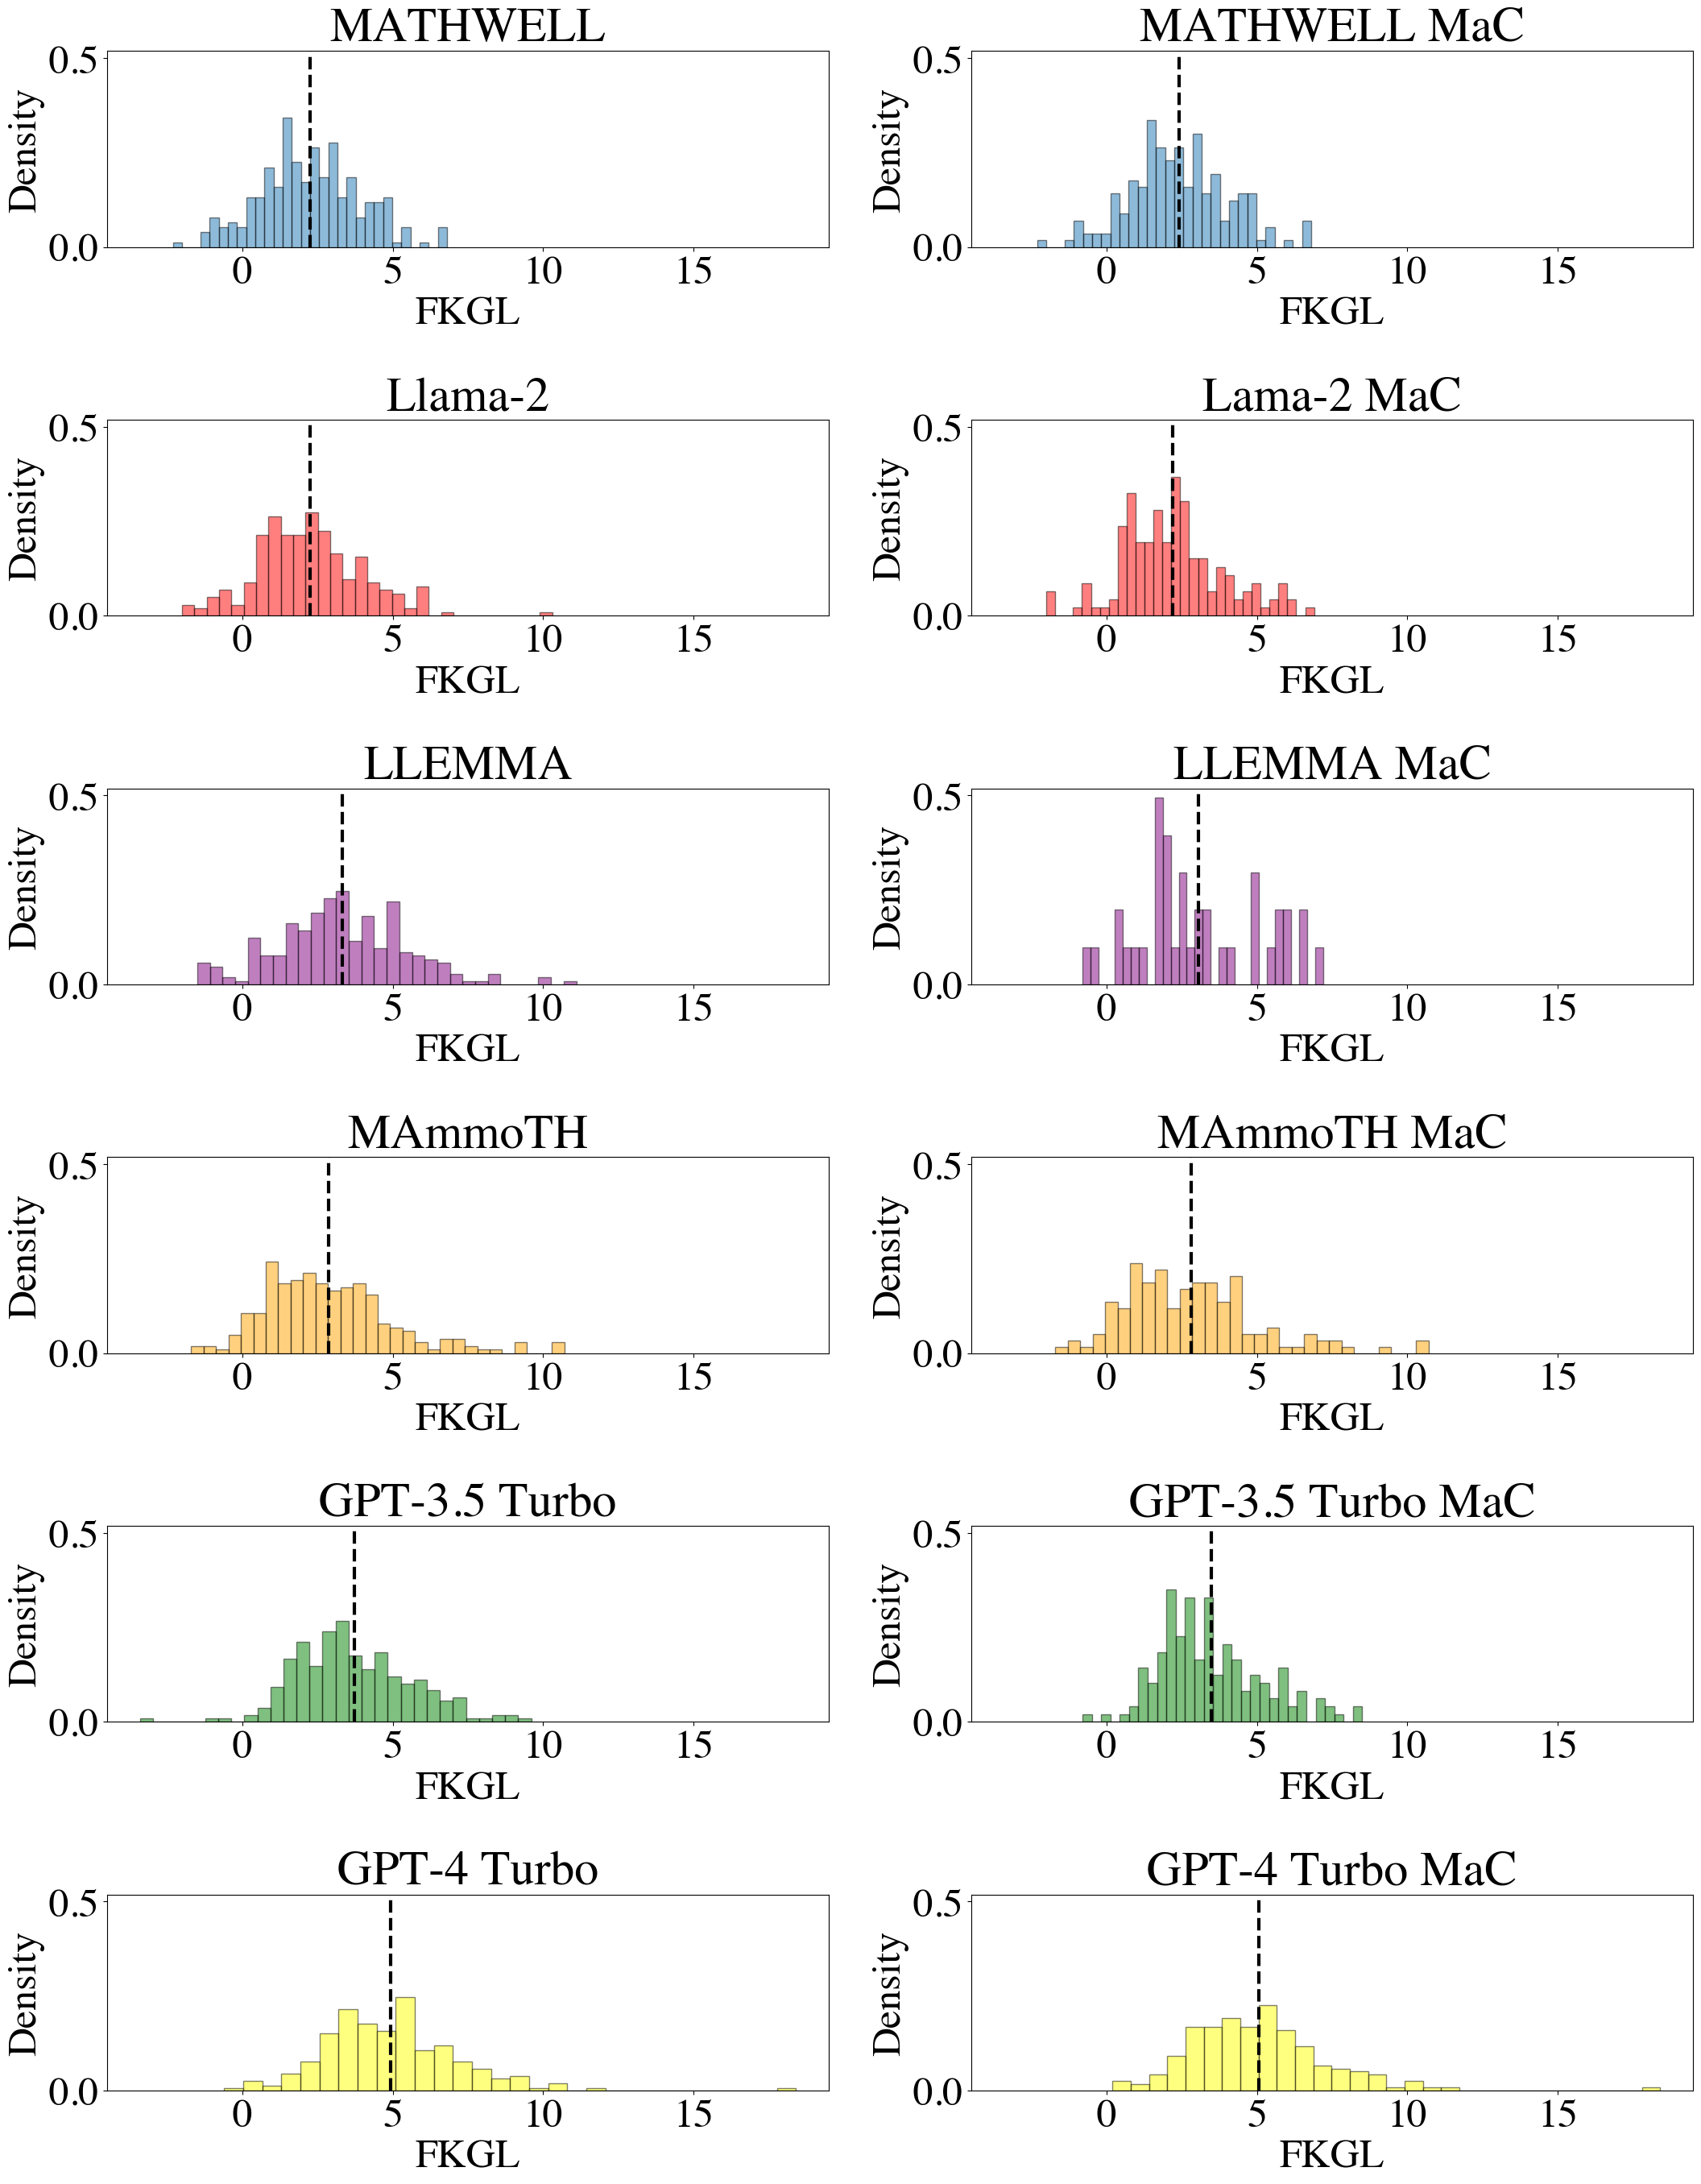

In [34]:
# Create a figure with two subplots (2 rows, 1 column)
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size': 36})
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(22, 28), sharex = True, sharey = True)

# Plot the first histogram on the top subplot
axs[0, 1].hist(mathwell_good_grades[0], bins=30, alpha=0.5, label='MATHWELL MaC', edgecolor='black', density=True)
axs[0, 1].set_title('MATHWELL MaC')
axs[0,1].axvline(np.mean(mathwell_good_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[1, 1].hist(llama_good_grades[0], bins=30, alpha=0.5, label='Llama-2 MaC', edgecolor='black', density=True, color = 'Red')
axs[1, 1].set_title('Lama-2 MaC')
axs[1,1].axvline(np.mean(llama_good_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[2, 1].hist(llema_good_grades[0], bins=30, alpha=0.5, label='LLEMMA MaC', edgecolor='black', density=True, color = 'Purple')
axs[2, 1].set_title('LLEMMA MaC')
axs[2,1].axvline(np.mean(llema_good_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[3, 1].hist(mammoth_good_grades[0], bins=30, alpha=0.5, label='MAmmoTH MaC', edgecolor='black', density=True, color= 'Orange')
axs[3, 1].set_title('MAmmoTH MaC')
axs[3,1].axvline(np.mean(mammoth_good_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[4, 1].hist(gpt35_good_grades[0], bins=30, alpha=0.5, label='GPT-3.5 MaC', edgecolor='black', density=True, color= 'Green')
axs[4, 1].set_title('GPT-3.5 Turbo MaC')
axs[4,1].axvline(np.mean(gpt35_good_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[5, 1].hist(gpt4_good_grades[0], bins=30, alpha=0.5, label='GPT-4 MaC', edgecolor='black', density=True, color= 'Yellow')
axs[5, 1].set_title('GPT-4 Turbo MaC')
axs[5,1].axvline(np.mean(gpt4_good_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[0, 0].hist(mathwell_all_grades[0], bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0, 0].set_title('MATHWELL')
axs[0,0].axvline(np.mean(mathwell_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[1, 0].hist(llama_all_grades[0], bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True, color = 'Red')
axs[1, 0].set_title('Llama-2')
axs[1,0].axvline(np.mean(llama_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[2, 0].hist(llema_all_grades[0], bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True, color = 'Purple')
axs[2, 0].set_title('LLEMMA')
axs[2,0].axvline(np.mean(llema_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[3, 0].hist(mammoth_all_grades[0], bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True, color= 'Orange')
axs[3, 0].set_title('MAmmoTH')
axs[3,0].axvline(np.mean(mammoth_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[4, 0].hist(gpt35_all_grades[0], bins=30, alpha=0.5, label='GPT3.5', edgecolor='black', density=True, color= 'Green')
axs[4, 0].set_title('GPT-3.5 Turbo')
axs[4,0].axvline(np.mean(gpt35_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[5, 0].hist(gpt4_all_grades[0], bins=30, alpha=0.5, label='GPT4', edgecolor='black', density=True, color= 'Yellow')
axs[5, 0].set_title('GPT-4 Turbo')
axs[5,0].axvline(np.mean(gpt4_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[0, 0].set_xlabel('FKGL')
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('FKGL')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('FKGL')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('FKGL')
axs[1, 1].set_ylabel('Density')
axs[2, 0].set_xlabel('FKGL')
axs[2, 0].set_ylabel('Density')
axs[2, 1].set_xlabel('FKGL')
axs[2, 1].set_ylabel('Density')
axs[3, 0].set_xlabel('FKGL')
axs[3, 0].set_ylabel('Density')
axs[3, 1].set_xlabel('FKGL')
axs[3, 1].set_ylabel('Density')
axs[4, 0].set_xlabel('FKGL')
axs[4, 0].set_ylabel('Density')
axs[4, 1].set_xlabel('FKGL')
axs[4, 1].set_ylabel('Density')
axs[5, 0].set_xlabel('FKGL')
axs[5, 0].set_ylabel('Density')
axs[5, 1].set_xlabel('FKGL')
axs[5, 1].set_ylabel('Density')
axs[0,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[0,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[1,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[1,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[2,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[2,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[3,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[3,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[4,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[4,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[5,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[5,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)

axs[0,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[1,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[2,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[3,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[4,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[5,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_models.pdf')

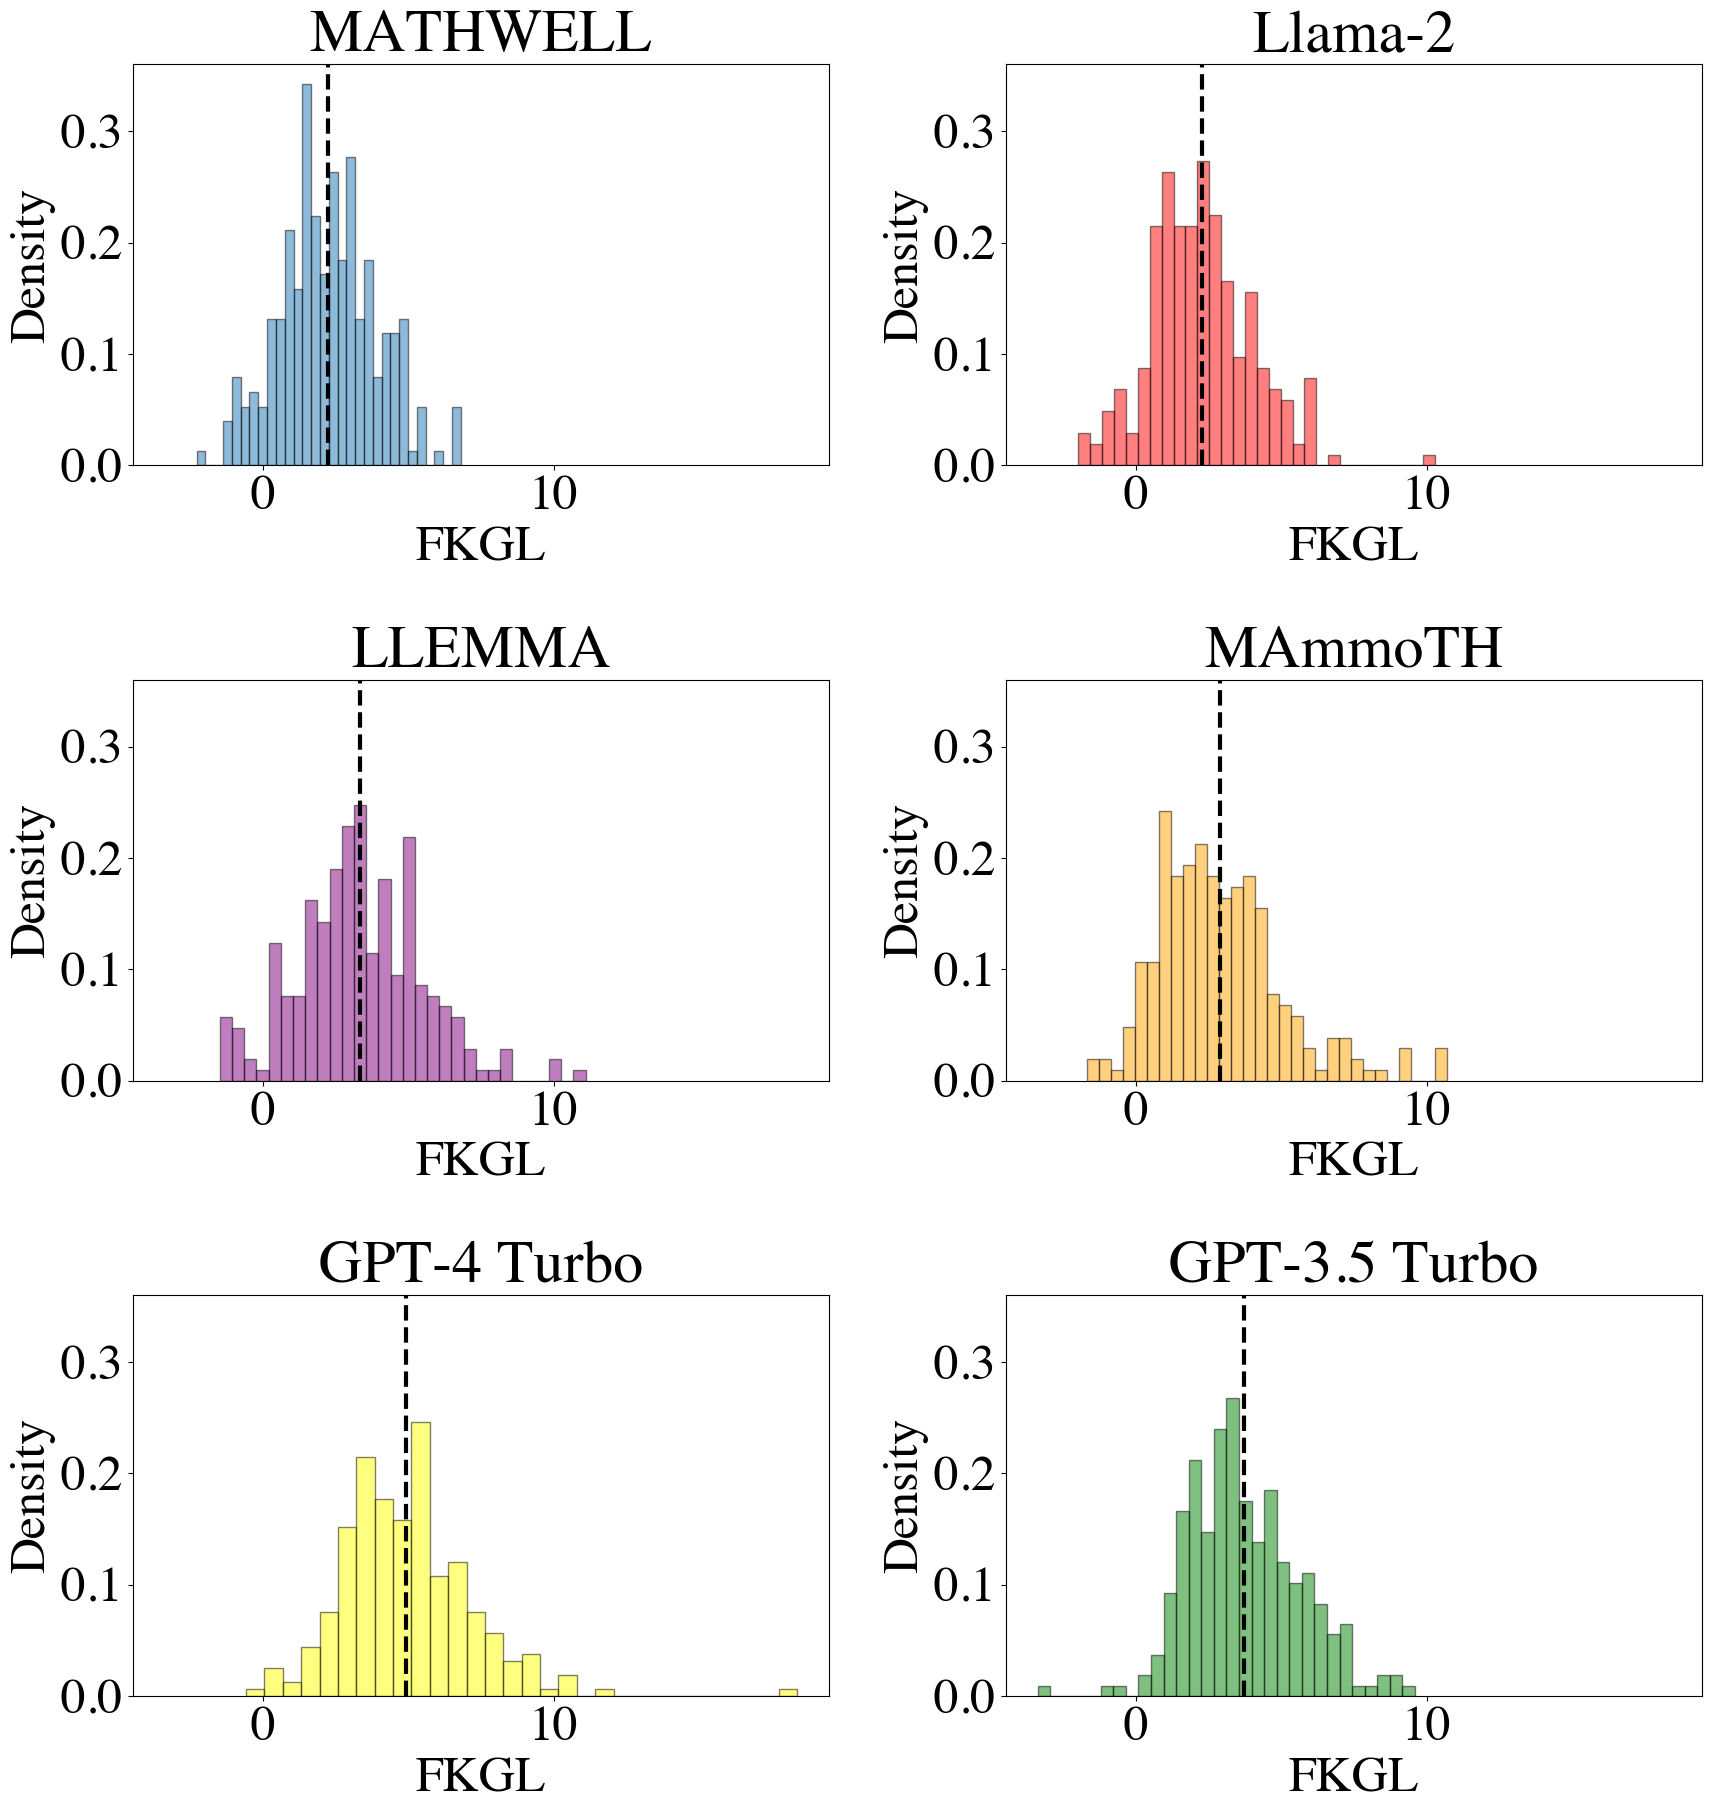

In [35]:
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size': 36})
from scipy import stats
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 19), sharex = True, sharey = True)

axs[0, 0].hist(mathwell_all_grades[0], bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0, 0].set_title('MATHWELL')
axs[0,0].axvline(np.mean(mathwell_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[0, 1].hist(llama_all_grades[0], bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True, color = 'Red')
axs[0, 1].set_title('Llama-2')
axs[0,1].axvline(np.mean(llama_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[1, 0].hist(llema_all_grades[0], bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True, color = 'Purple')
axs[1, 0].set_title('LLEMMA')
axs[1,0].axvline(np.mean(llema_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[1, 1].hist(mammoth_all_grades[0], bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True, color= 'Orange')
axs[1, 1].set_title('MAmmoTH')
axs[1,1].axvline(np.mean(mammoth_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[2, 1].hist(gpt35_all_grades[0], bins=30, alpha=0.5, label='GPT-3.5', edgecolor='black', density=True, color= 'Green')
axs[2, 1].set_title('GPT-3.5 Turbo')
axs[2,1].axvline(np.mean(gpt35_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[2, 0].hist(gpt4_all_grades[0], bins=30, alpha=0.5, label='GPT-4', edgecolor='black', density=True, color= 'Yellow')
axs[2, 0].set_title('GPT-4 Turbo')
axs[2,0].axvline(np.mean(gpt4_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[0, 0].set_xlabel('FKGL')
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('FKGL')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('FKGL')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('FKGL')
axs[1, 1].set_ylabel('Density')
axs[2, 1].set_xlabel('FKGL')
axs[2, 1].set_ylabel('Density')
axs[2, 0].set_xlabel('FKGL')
axs[2, 0].set_ylabel('Density')
# axs[2, 0].set_xlabel('FKGL')
# axs[2, 0].set_ylabel('Density')
# axs[2, 1].set_xlabel('FKGL')
# axs[2, 1].set_ylabel('Density')
# axs[3, 0].set_xlabel('FKGL')
# axs[3, 0].set_ylabel('Density')
# axs[3, 1].set_xlabel('FKGL')
# axs[3, 1].set_ylabel('Density')
axs[0,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[0,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[1,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[1,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[2,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[2,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
# axs[2,0].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
# axs[2,1].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
# axs[3,0].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
# axs[3,1].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)

axs[0,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[1,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[2,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
# axs[2,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)
# axs[3,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)

# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_models_all.pdf')

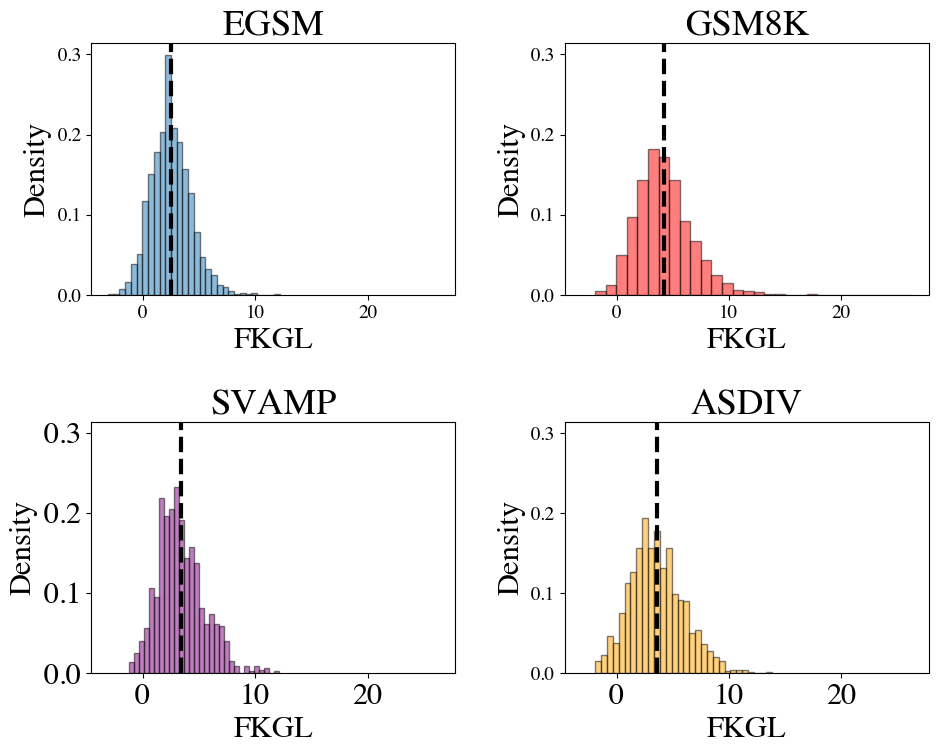

In [50]:
# Create a figure with two subplots (2 rows, 1 column)
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size': 22})
from scipy import stats
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex = True, sharey = True)

axs[0,0].hist(mathwell_train_grades[0], bins=30, alpha=0.5, label='EGSM', edgecolor='black', density=True)
axs[0,1].hist(gsm8k_grades[0], bins=30, alpha=0.5, label='GSM8K', edgecolor='black', density=True, color = "Red")
axs[1,0].hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black', density=True, color = "Purple")
axs[1,1].hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black', density=True, color = "Orange")
axs[0, 0].set_title('EGSM')
axs[0, 1].set_title('GSM8K')
axs[1, 0].set_title('SVAMP')
axs[1, 1].set_title('ASDIV')
# axs[0, 0].legend()
# axs[0, 1].legend()
# axs[1, 0].legend()
# axs[1, 1].legend()
axs[0,0].axvline(np.mean(mathwell_train_grades[0]), color='k', linestyle='dashed', linewidth=3)
axs[0,1].axvline(np.mean(gsm8k_grades[0]), color='k', linestyle='dashed', linewidth=3)
axs[1,0].axvline(np.mean(svamp_grades), color='k', linestyle='dashed', linewidth=3)
axs[1,1].axvline(np.mean(asdiv_grades), color='k', linestyle='dashed', linewidth=3)
axs[0, 0].set_xlabel('FKGL')
axs[0,0].tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
axs[0,1].tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
axs[0,1].tick_params(axis='y', which='both', labelsize=14, labelleft=True)
axs[1,1].tick_params(axis='y', which='both', labelsize=14, labelleft=True)
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('FKGL')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('FKGL')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('FKGL')
axs[1, 1].set_ylabel('Density')

# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_datasets.pdf')

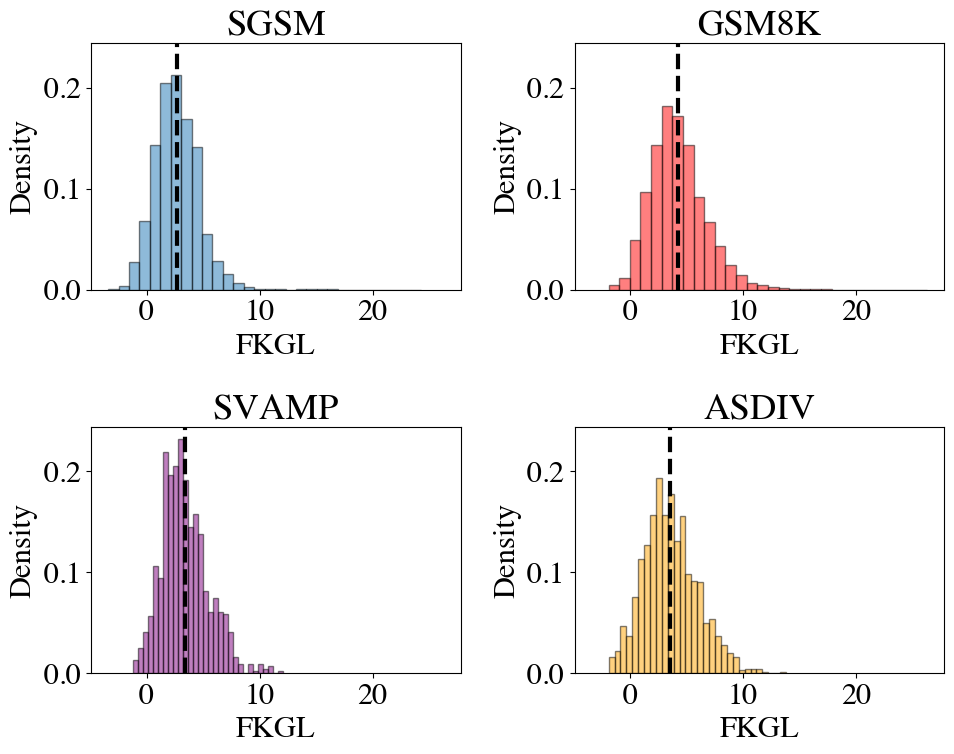

In [37]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex = True, sharey = True)

axs[0,0].hist(sgsm_grades[0], bins=30, alpha=0.5, label='SGSM', edgecolor='black', density=True)
axs[0,1].hist(gsm8k_grades[0], bins=30, alpha=0.5, label='MathInstruct GSM8K', edgecolor='black', density=True, color = "Red")
axs[1,0].hist(svamp_grades, bins=30, alpha=0.5, label='SVAMP', edgecolor='black', density=True, color = "Purple")
axs[1,1].hist(asdiv_grades, bins=30, alpha=0.5, label='ASDIV', edgecolor='black', density=True, color = "Orange")
axs[0, 0].set_title('SGSM')
axs[0, 1].set_title('GSM8K')
axs[1, 0].set_title('SVAMP')
axs[1, 1].set_title('ASDIV')
# axs[0, 0].legend()
# axs[0, 1].legend()
# axs[1, 0].legend()
# axs[1, 1].legend()
axs[0,0].axvline(np.mean(sgsm_grades[0]), color='k', linestyle='dashed', linewidth=3)
axs[0,1].axvline(np.mean(gsm8k_grades[0]), color='k', linestyle='dashed', linewidth=3)
axs[1,0].axvline(np.mean(svamp_grades), color='k', linestyle='dashed', linewidth=3)
axs[1,1].axvline(np.mean(asdiv_grades), color='k', linestyle='dashed', linewidth=3)
axs[0, 0].set_xlabel('FKGL')
axs[0,0].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
axs[0,1].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
axs[0,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)
axs[1,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('FKGL')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('FKGL')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('FKGL')
axs[1, 1].set_ylabel('Density')

# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_datasets_sgsm.pdf')

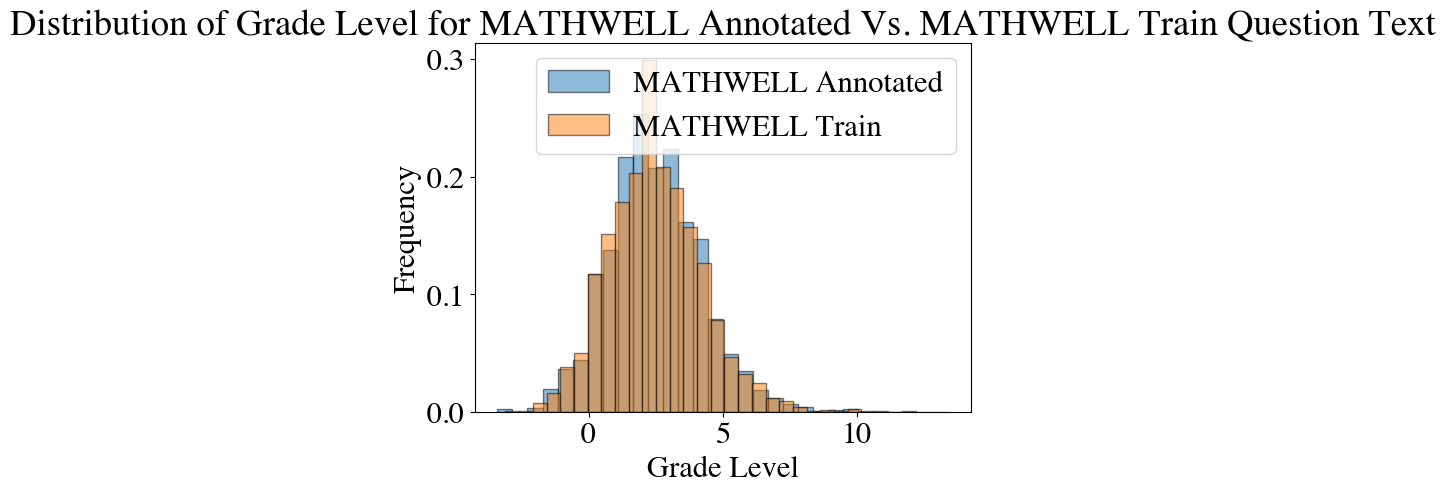

In [38]:
# Create a histogram
plt.hist(mathwell_an_grades[0], bins=30, alpha=0.5, label='MATHWELL Annotated', edgecolor='black', density=True)
plt.hist(mathwell_train_grades[0], bins=30, alpha=0.5, label='MATHWELL Train', edgecolor='black', density=True)

# Customize the plot
plt.title('Distribution of Grade Level for MATHWELL Annotated Vs. MATHWELL Train Question Text')
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

Text(0.0, 0.5, 'Density')

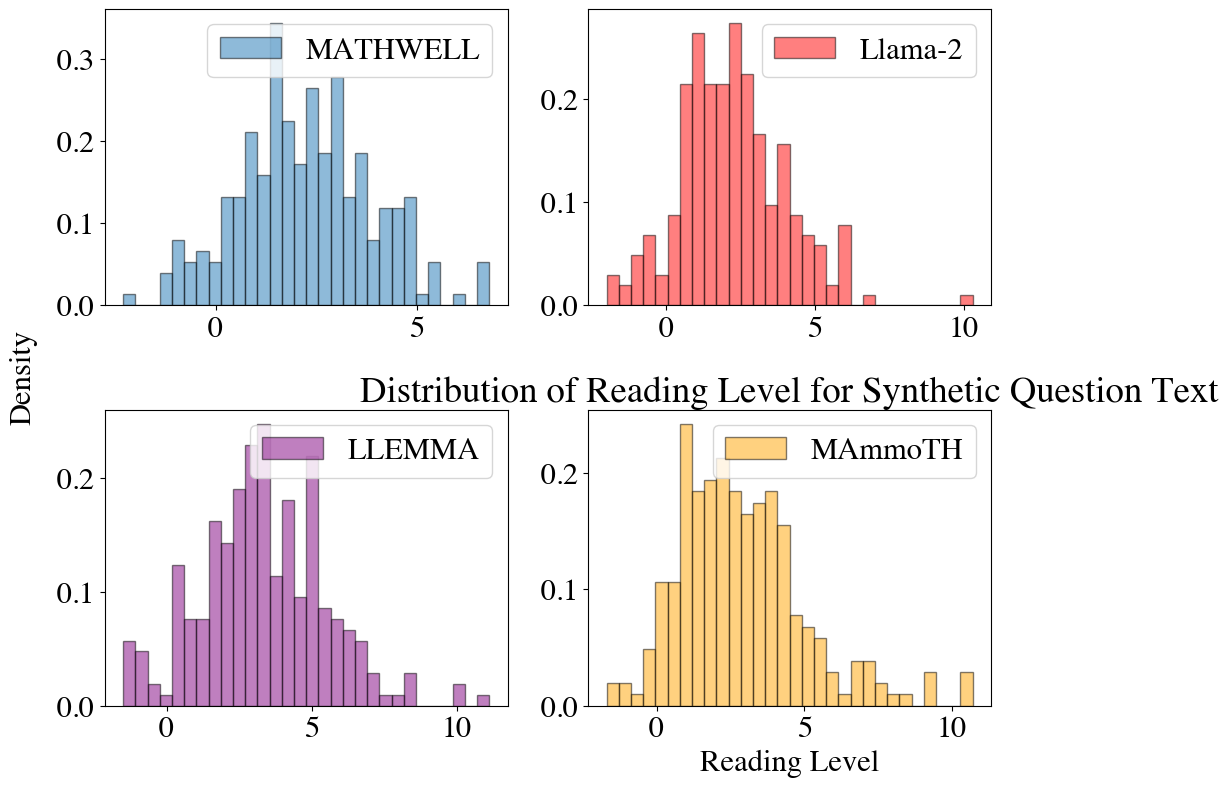

In [39]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first histogram on the top subplot
plt.title('Distribution of Reading Level for Synthetic Question Text')
axs[0, 0].hist(mathwell_all_grades[0], bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0, 1].hist(llama_all_grades[0], bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True, color = 'Red')
axs[1, 0].hist(llema_all_grades[0], bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True, color = 'Purple')
axs[1, 1].hist(mammoth_all_grades[0], bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True, color= 'Orange')
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

# Customize the overall layout
plt.tight_layout()
plt.xlabel('Reading Level')
fig.text(0.0, 0.5, 'Density', ha='center', va='center', rotation='vertical')

## NDC Plots

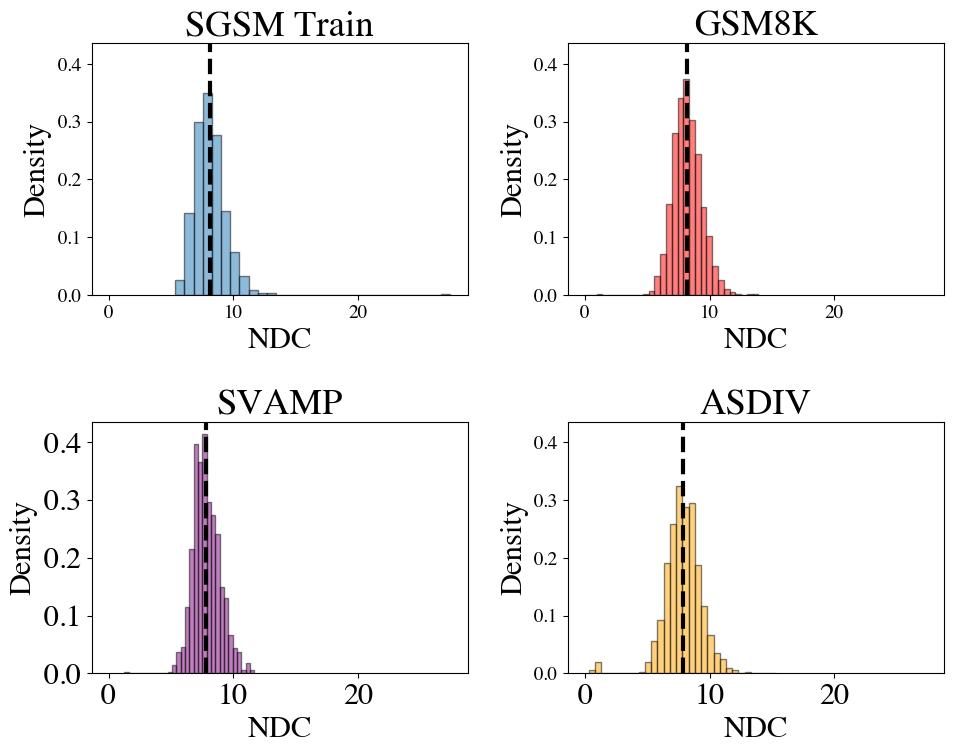

In [40]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex = True, sharey = True)

axs[0,0].hist(mathwell_train_grades[1], bins=30, alpha=0.5, label='SGSM Train', edgecolor='black', density=True)
axs[0,1].hist(gsm8k_ndc, bins=30, alpha=0.5, label='GSM8K', edgecolor='black', density=True, color = "Red")
axs[1,0].hist(svamp_ndc, bins=30, alpha=0.5, label='SVAMP', edgecolor='black', density=True, color = "Purple")
axs[1,1].hist(asdiv_ndc, bins=30, alpha=0.5, label='ASDIV', edgecolor='black', density=True, color = "Orange")
axs[0, 0].set_title('SGSM Train')
axs[0, 1].set_title('GSM8K')
axs[1, 0].set_title('SVAMP')
axs[1, 1].set_title('ASDIV')
# axs[0, 0].legend()
# axs[0, 1].legend()
# axs[1, 0].legend()
# axs[1, 1].legend()
axs[0,0].axvline(np.mean(mathwell_train_grades[1]), color='k', linestyle='dashed', linewidth=3)
axs[0,1].axvline(np.mean(gsm8k_ndc), color='k', linestyle='dashed', linewidth=3)
axs[1,0].axvline(np.mean(svamp_ndc), color='k', linestyle='dashed', linewidth=3)
axs[1,1].axvline(np.mean(asdiv_ndc), color='k', linestyle='dashed', linewidth=3)
axs[0, 0].set_xlabel('NDC')
axs[0,0].tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
axs[0,1].tick_params(axis='both', which='both', labelsize=14, labelbottom=True)
axs[0,1].tick_params(axis='y', which='both', labelsize=14, labelleft=True)
axs[1,1].tick_params(axis='y', which='both', labelsize=14, labelleft=True)
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('NDC')
axs[0, 1].set_ylabel('Density')
axs[1, 0].set_xlabel('NDC')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('NDC')
axs[1, 1].set_ylabel('Density')

# Customize the overall layout
plt.tight_layout()
plt.savefig('ndc_datasets.png')

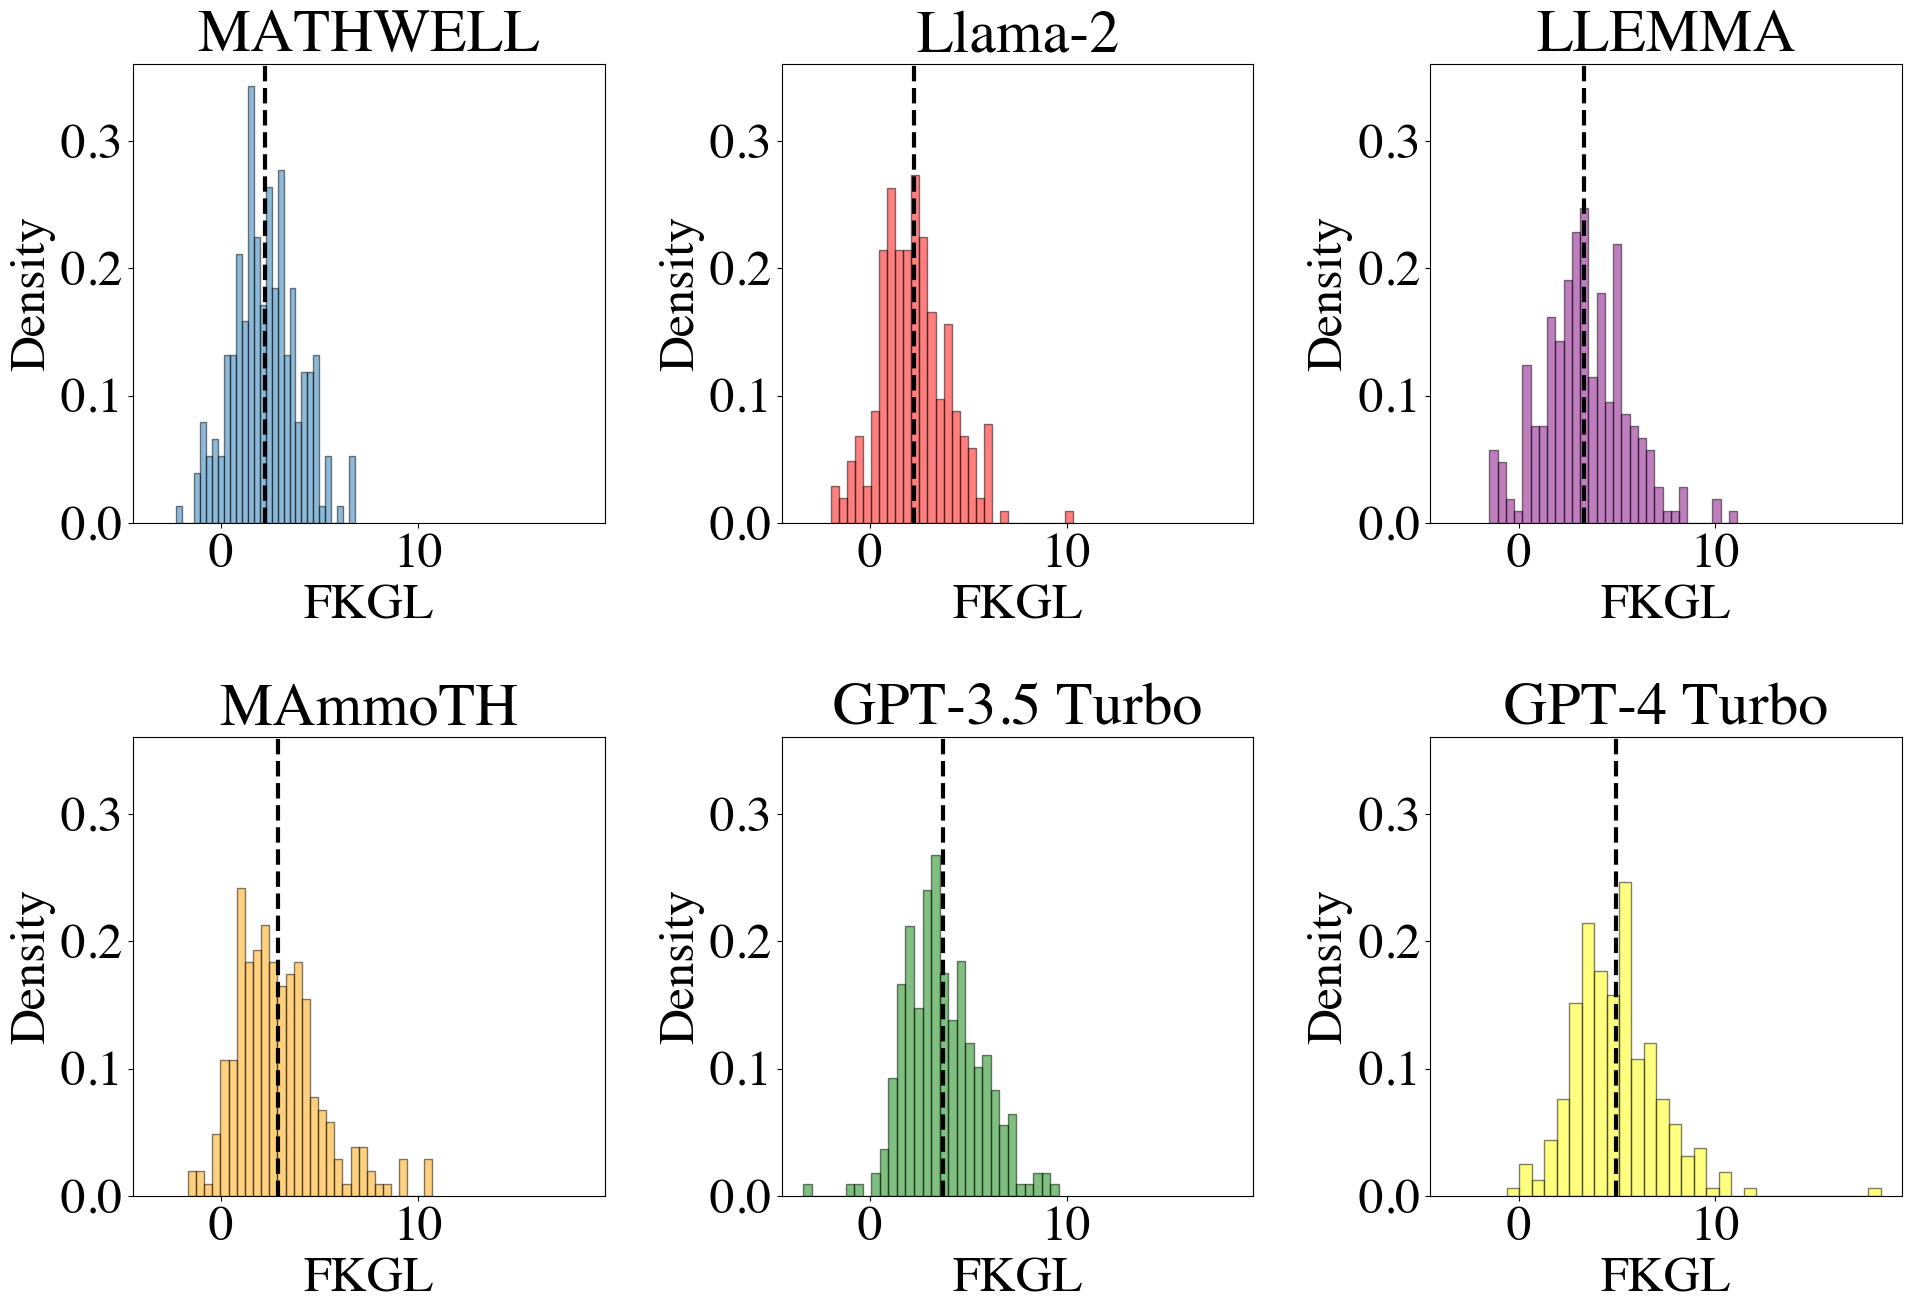

In [49]:
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size': 36})
from scipy import stats
# Create a figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 14), sharex = True, sharey = True)

axs[0, 0].hist(mathwell_all_grades[0], bins=30, alpha=0.5, label='MATHWELL', edgecolor='black', density=True)
axs[0, 0].set_title('MATHWELL')
axs[0,0].axvline(np.mean(mathwell_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[0, 1].hist(llama_all_grades[0], bins=30, alpha=0.5, label='Llama-2', edgecolor='black', density=True, color = 'Red')
axs[0, 1].set_title('Llama-2')
axs[0,1].axvline(np.mean(llama_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[0, 2].hist(llema_all_grades[0], bins=30, alpha=0.5, label='LLEMMA', edgecolor='black', density=True, color = 'Purple')
axs[0, 2].set_title('LLEMMA')
axs[0,2].axvline(np.mean(llema_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[1, 0].hist(mammoth_all_grades[0], bins=30, alpha=0.5, label='MAmmoTH', edgecolor='black', density=True, color= 'Orange')
axs[1, 0].set_title('MAmmoTH')
axs[1,0].axvline(np.mean(mammoth_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[1, 1].hist(gpt35_all_grades[0], bins=30, alpha=0.5, label='GPT-3.5', edgecolor='black', density=True, color= 'Green')
axs[1, 1].set_title('GPT-3.5 Turbo')
axs[1,1].axvline(np.mean(gpt35_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[1, 2].hist(gpt4_all_grades[0], bins=30, alpha=0.5, label='GPT-4', edgecolor='black', density=True, color= 'Yellow')
axs[1, 2].set_title('GPT-4 Turbo')
axs[1,2].axvline(np.mean(gpt4_all_grades[0]), color='k', linestyle='dashed', linewidth=3)

axs[0, 0].set_xlabel('FKGL')
axs[0, 0].set_ylabel('Density')
axs[0, 1].set_xlabel('FKGL')
axs[0, 1].set_ylabel('Density')
axs[0, 2].set_xlabel('FKGL')
axs[0, 2].set_ylabel('Density')
axs[1, 0].set_xlabel('FKGL')
axs[1, 0].set_ylabel('Density')
axs[1, 1].set_xlabel('FKGL')
axs[1, 1].set_ylabel('Density')
axs[1, 2].set_xlabel('FKGL')
axs[1, 2].set_ylabel('Density')
# axs[2, 0].set_xlabel('FKGL')
# axs[2, 0].set_ylabel('Density')
# axs[2, 1].set_xlabel('FKGL')
# axs[2, 1].set_ylabel('Density')
# axs[3, 0].set_xlabel('FKGL')
# axs[3, 0].set_ylabel('Density')
# axs[3, 1].set_xlabel('FKGL')
# axs[3, 1].set_ylabel('Density')
axs[0,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[0,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[0,2].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[1,0].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[1,1].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
axs[1,2].tick_params(axis='both', which='both', labelsize=36, labelbottom=True)
# axs[2,0].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
# axs[2,1].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
# axs[3,0].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)
# axs[3,1].tick_params(axis='both', which='both', labelsize=22, labelbottom=True)

axs[0,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[0,2].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[1,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
axs[1,2].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
#axs[2,1].tick_params(axis='y', which='both', labelsize=36, labelleft=True)
# axs[2,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)
# axs[3,1].tick_params(axis='y', which='both', labelsize=22, labelleft=True)

# Customize the overall layout
plt.tight_layout()
plt.savefig('reading_level_models_poster.pdf')